# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

c:\Users\yqing\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


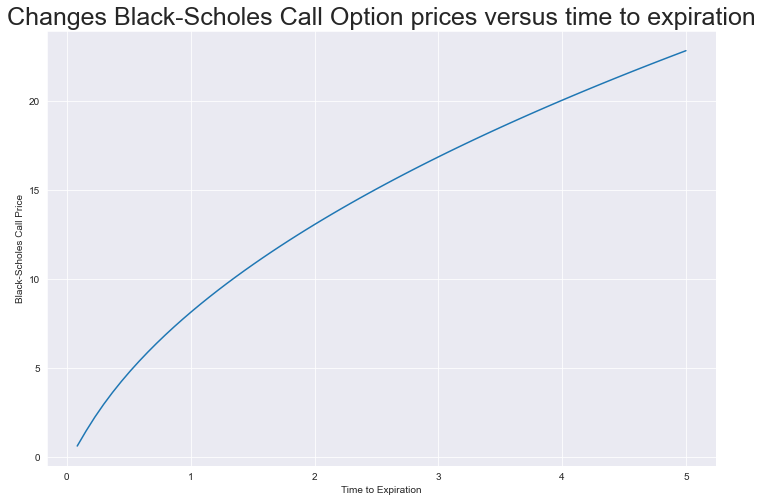

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices versus time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

a): First of all, it is more conventional to invert the x-axis and plot time to expiration from positive to zero, as it is usually shown in books about options. we could study the dimishing of time premium of call options using such plots. We could plot the call option price for three different spot prices, say 100, 105 and 115. Notice for 2 of them the value of the call option would eventually decay to zero.

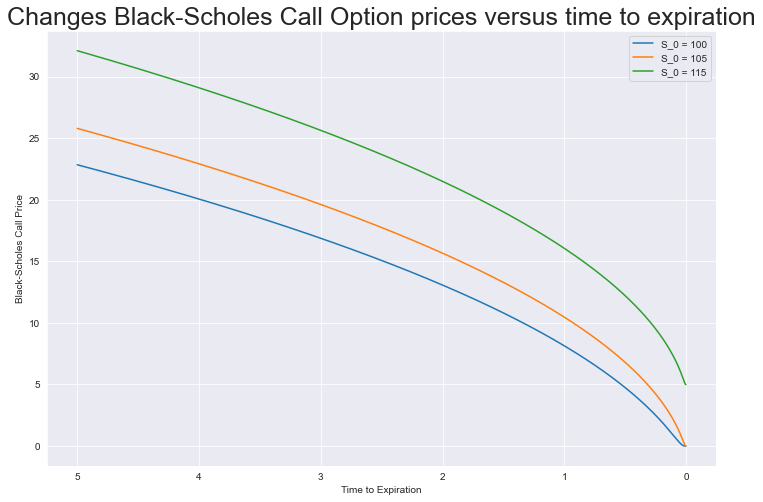

In [39]:
S0_1 = 100
S0_2 = 105
S0_3 = 115
K = 110
sigma = .3
times = np.linspace(1/1000, 5, 2000)


call_prices_1 = [bs_call(S0_1,K,sigma, t = times[i]) for i in range(len(times))]
call_prices_2 = [bs_call(S0_2,K,sigma, t = times[i]) for i in range(len(times))]
call_prices_3 = [bs_call(S0_3,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.plot(times, call_prices_1, label='S_0 = 100')
plt.plot(times, call_prices_2, label='S_0 = 105')
plt.plot(times, call_prices_3, label='S_0 = 115')
plt.legend()
plt.gca().invert_xaxis()
plt.title('Changes Black-Scholes Call Option prices versus time to expiration', size = 25)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

It appears that the value of call option is monotonely increasing with respect to time, this is understandable as the plot reflects to the deminishing of time premium of the call option. The quantity that is used to describe this rate is the greek letter $\Theta=-\frac{\partial V}{\partial \tau}$, we are saying that $\Theta(\tau)$ is always negative. Let's verify this observation.

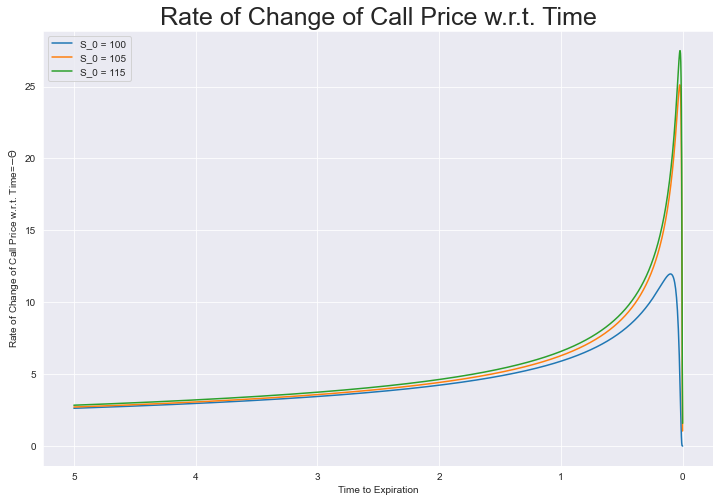

In [26]:
theta_1 = np.gradient(call_prices_1, times)
theta_2 = np.gradient(call_prices_2, times)
theta_3 = np.gradient(call_prices_3, times)
plt.figure(figsize = (12,8))
plt.plot(times, theta_1, label='S_0 = 100')
plt.plot(times, theta_2, label='S_0 = 105')
plt.plot(times, theta_3, label='S_0 = 115')
plt.legend()
plt.gca().invert_xaxis()
plt.title('Rate of Change of Call Price w.r.t. Time', size = 25)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change of Call Price w.r.t. Time=$-\Theta$')
plt.show()

Furthermore, we observe that there appears to be a unique local extrema for $\Theta$ with respect to time which is defined implicitly depending all parameters. Also, the absoluate value of theta appears to be bigger whenever the spot price is closer to the strike price.

b): We plot call option price versus spot price first, where we fix time to be exactly 3, 0.5 and 0.05. 

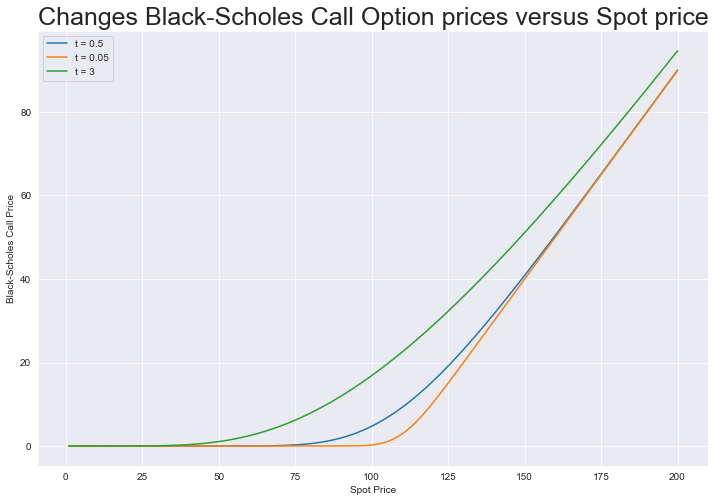

In [40]:
Spots = np.linspace(1, 200, 2000)
K = 110
sigma = .3
times_1 = 0.5
times_2 = 0.05
times_3 = 3



call_prices_t1 = [bs_call(Spots[i], K, sigma, times_1) for i in range(len(Spots))]
call_prices_t2 = [bs_call(Spots[i], K, sigma, times_2) for i in range(len(Spots))]
call_prices_t3 = [bs_call(Spots[i], K, sigma, times_3) for i in range(len(Spots))]

plt.figure(figsize = (12,8))
plt.plot(Spots, call_prices_t1, label='t = 0.5')
plt.plot(Spots, call_prices_t2, label='t = 0.05')
plt.plot(Spots, call_prices_t3, label='t = 3')
plt.legend()
#plt.gca().invert_xaxis()
plt.title('Changes Black-Scholes Call Option prices versus Spot price', size = 25)
plt.xlabel('Spot Price')
plt.ylabel('Black-Scholes Call Price')
plt.show()

It appears that V is monotonly increasing with respect to the spot price ($\Delta > 0$), and the rate of change $\Delta=\frac{\partial V}{\partial S}$ also appears to be monotonely increasing ($\Gamma>0$). We can verify this observation in the next plot for those 3 chosen time. 

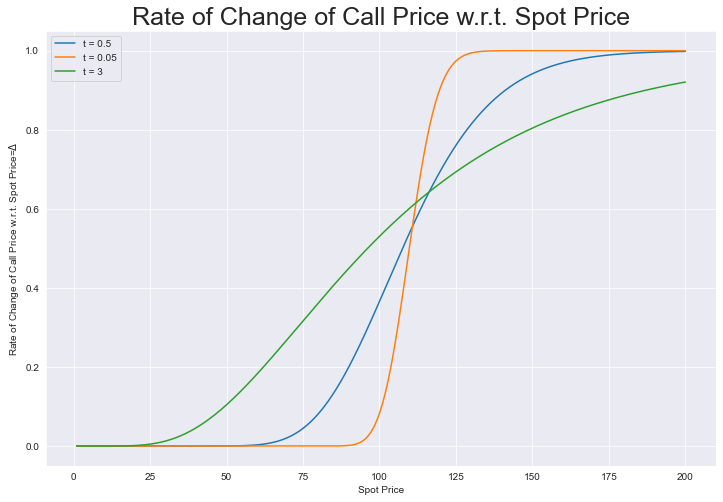

In [41]:
delta_1 = np.gradient(call_prices_t1, Spots)
delta_2 = np.gradient(call_prices_t2, Spots)
delta_3 = np.gradient(call_prices_t3, Spots)
plt.figure(figsize = (12,8))
plt.plot(Spots, delta_1, label='t = 0.5')
plt.plot(Spots, delta_2, label='t = 0.05')
plt.plot(Spots, delta_3, label='t = 3')
plt.legend()
#plt.gca().invert_xaxis()
plt.title('Rate of Change of Call Price w.r.t. Spot Price', size = 25)
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change of Call Price w.r.t. Spot Price=$\Delta$')
plt.show()

As a matter of fact, we can plot the call option price as a heat map with respect to both time and spot price.

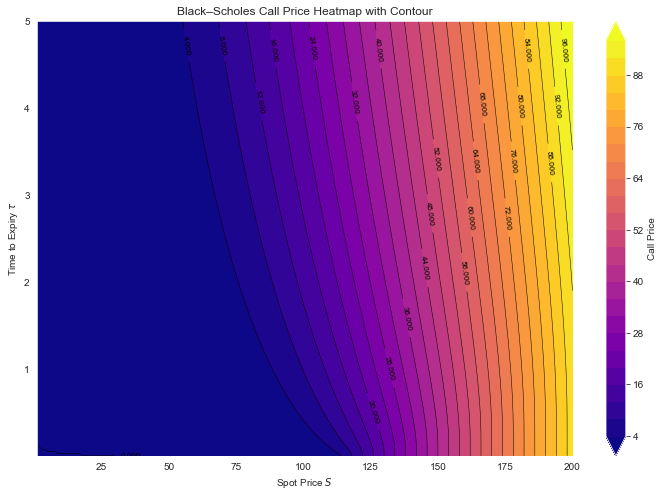

In [6]:
Spots = np.linspace(1, 200, 200)
times = np.linspace(1/1000, 5, 200)
K = 110
sigma = .3

call_matrix = np.empty((len(times), len(Spots)))
for i, j in enumerate(times):
    call_matrix[i, :] = [bs_call(S0, K, sigma, j) for S0 in Spots]

plt.figure(figsize=(12,8))
cf = plt.contourf(Spots, times, call_matrix,
                  levels=25,      
                  cmap='plasma',
                  extend='both')  
plt.colorbar(cf, label='Call Price')


cs = plt.contour(Spots, times, call_matrix,
                 levels=25,
                 colors='k',
                 linewidths=0.5)
plt.clabel(cs, inline=1, fontsize=8)

plt.xlabel('Spot Price $S$')
plt.ylabel('Time to Expiry $τ$')
plt.title('Black–Scholes Call Price Heatmap with Contour')
plt.show()

c) Surely we can recycle the code for put option prices. and we plot the put option price for three different spot prices, say 120, 105 and 115, where 2 of them will expire OTM. 

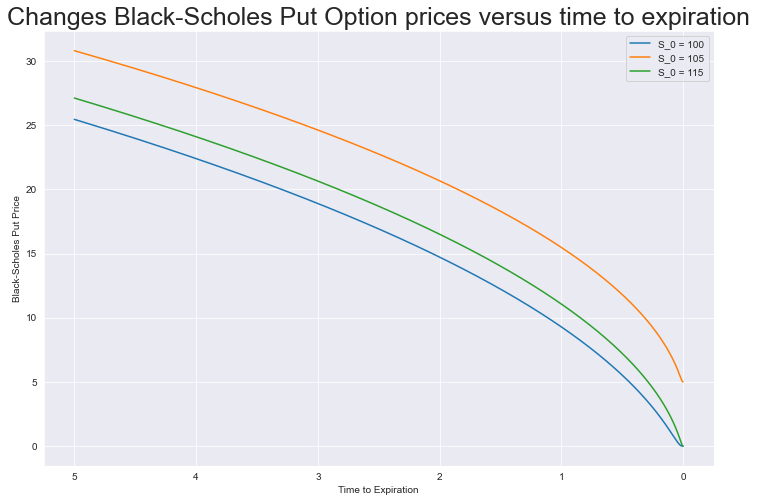

In [8]:
S0_1 = 120
S0_2 = 105
S0_3 = 115
K = 110
sigma = .3
times = np.linspace(1/1000, 5, 2000)


put_prices_1 = [bs_put(S0_1,K,sigma, t = times[i]) for i in range(len(times))]
put_prices_2 = [bs_put(S0_2,K,sigma, t = times[i]) for i in range(len(times))]
put_prices_3 = [bs_put(S0_3,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.plot(times, put_prices_1, label='S_0 = 100')
plt.plot(times, put_prices_2, label='S_0 = 105')
plt.plot(times, put_prices_3, label='S_0 = 115')
plt.legend()
plt.gca().invert_xaxis()
plt.title('Changes Black-Scholes Put Option prices versus time to expiration', size = 25)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

This plot looks almost exactly like the one for call options, and we expect the same conclusion: the value of put option is monotonely increasing with respect to time i.e.  $\Theta(\tau)$ is always negative. In fact, using call-put pariety formula the value of $\Theta$ should be exactly the same if all other parameters are the same.

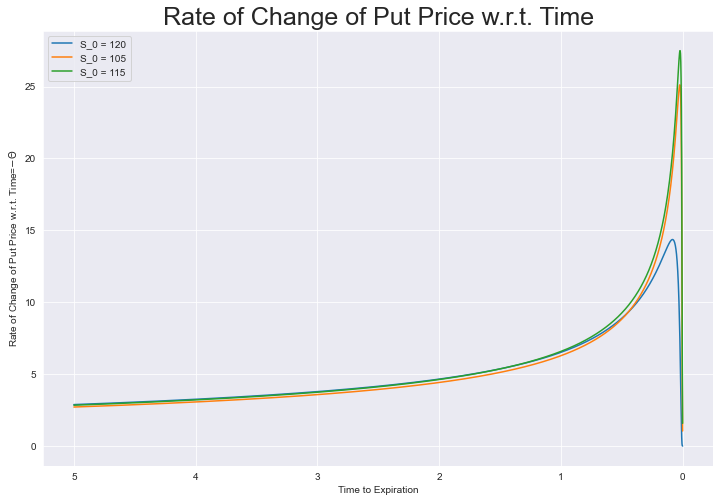

In [9]:
theta_1 = np.gradient(put_prices_1, times)
theta_2 = np.gradient(put_prices_2, times)
theta_3 = np.gradient(put_prices_3, times)
plt.figure(figsize = (12,8))
plt.plot(times, theta_1, label='S_0 = 120')
plt.plot(times, theta_2, label='S_0 = 105')
plt.plot(times, theta_3, label='S_0 = 115')
plt.legend()
plt.gca().invert_xaxis()
plt.title('Rate of Change of Put Price w.r.t. Time', size = 25)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change of Put Price w.r.t. Time=$-\Theta$')
plt.show()

For the rate of change of put option value with respect to spot price, the expectation is that $\Delta$ will be negative and $\Gamma$ will be positive; as a matter of fact, $\Delta$ for the put option is  bounded between -1 and 0 using the put call parity formula and the fact that $\Delta$ for call option is bounded by 0 and 1 (since it equals to the value of some CDF function) and if all other parameters are the same then
$\Delta_c = \Delta_p +1,$
and
$\Gamma_c=\Gamma_p.$

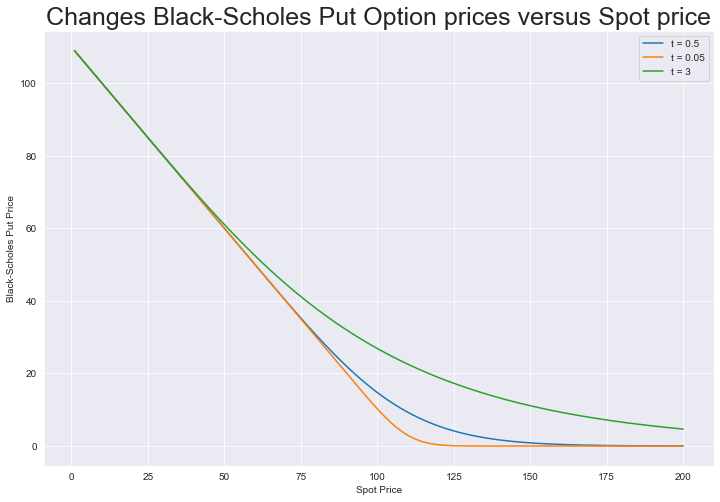

In [14]:
Spots = np.linspace(1, 200, 2000)
K = 110
sigma = .3
times_1 = 0.5
times_2 = 0.05
times_3 = 3



put_prices_t1 = [bs_put(Spots[i], K, sigma, times_1) for i in range(len(Spots))]
put_prices_t2 = [bs_put(Spots[i], K, sigma, times_2) for i in range(len(Spots))]
put_prices_t3 = [bs_put(Spots[i], K, sigma, times_3) for i in range(len(Spots))]

plt.figure(figsize = (12,8))
plt.plot(Spots, put_prices_t1, label='t = 0.5')
plt.plot(Spots, put_prices_t2, label='t = 0.05')
plt.plot(Spots, put_prices_t3, label='t = 3')
plt.legend()
#plt.gca().invert_xaxis()
plt.title('Changes Black-Scholes Put Option prices versus Spot price', size = 25)
plt.xlabel('Spot Price')
plt.ylabel('Black-Scholes Put Price')
plt.show()

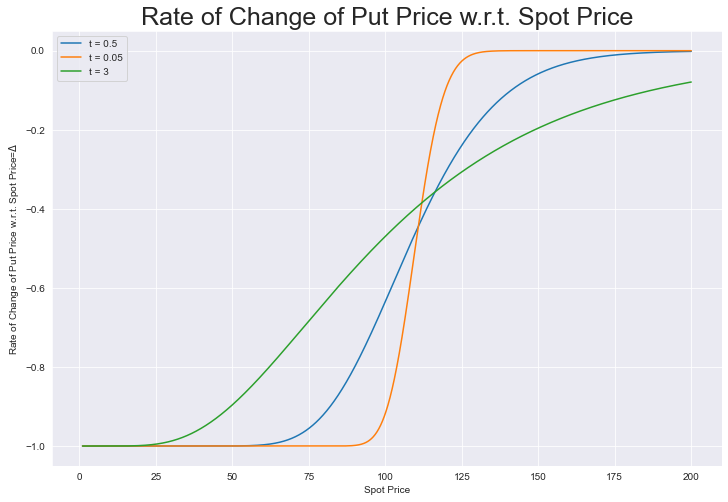

In [15]:
delta_p1 = np.gradient(put_prices_t1, Spots)
delta_p2 = np.gradient(put_prices_t2, Spots)
delta_p3 = np.gradient(put_prices_t3, Spots)
plt.figure(figsize = (12,8))
plt.plot(Spots, delta_p1, label='t = 0.5')
plt.plot(Spots, delta_p2, label='t = 0.05')
plt.plot(Spots, delta_p3, label='t = 3')
plt.legend()
#plt.gca().invert_xaxis()
plt.title('Rate of Change of Put Price w.r.t. Spot Price', size = 25)
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change of Put Price w.r.t. Spot Price=$\Delta$')
plt.show()

We can again plot the put option price as a heat map with respect to both time and spot price.

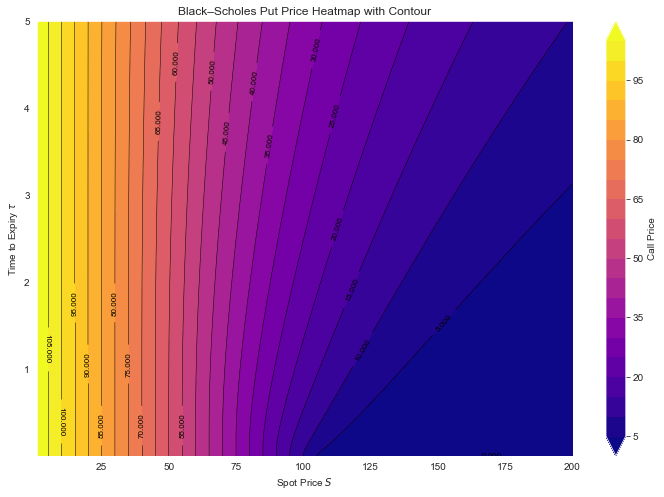

In [16]:
Spots = np.linspace(1, 200, 200)
times = np.linspace(1/1000, 5, 200)
K = 110
sigma = .3

put_matrix = np.empty((len(times), len(Spots)))
for i, j in enumerate(times):
    put_matrix[i, :] = [bs_put(S0, K, sigma, j) for S0 in Spots]

plt.figure(figsize=(12,8))
cf = plt.contourf(Spots, times, put_matrix,
                  levels=25,      
                  cmap='plasma',
                  extend='both')  
plt.colorbar(cf, label='Call Price')


cs = plt.contour(Spots, times, put_matrix,
                 levels=25,
                 colors='k',
                 linewidths=0.5)
plt.clabel(cs, inline=1, fontsize=8)

plt.xlabel('Spot Price $S$')
plt.ylabel('Time to Expiry $τ$')
plt.title('Black–Scholes Put Price Heatmap with Contour')
plt.show()

d): In conclusion: for both call and put options $\Theta$ is always negative, meaning time premium decreases with time, and $\Theta_c=\Theta_p$ given all other parameters are identical using call-put parity. For call optionn $\Delta$ will be positive and $\Gamma$ will be positive while for put option $\Delta$ will be negative and $\Gamma$ stays positive; as a matter of fact, they are related to each other based on the formulas below given all other parameters are the same then
$\Delta_c = \Delta_p +1,$
and
$\Gamma_c=\Gamma_p.$